In [4]:
# import dependencies

import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, precision_score, recall_score

# getting path for dataset
for dirname, _, filenames in os.walk('E:\MSc DataAnalytics\Learning\DMML_1\CreditCardFraud'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

E:\MSc DataAnalytics\Learning\DMML_1\CreditCardFraud\creditcard.csv


In [ ]:
pip install train_test_split

In [2]:
pip install sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 7.5/7.5 MB 851.3 kB/s eta 0:00:00
     -------------------------------------- 40.1/40.1 MB 738.3 kB/s eta 0:00:00
     ------------------------------------ 298.0/298.0 kB 511.1 kB/s eta 0:00:00
Using legacy 'setup.py install' for sklearn, since package 'wheel' is not installed.
  Running setup.py install for sklearn: started
  Running setup.py install for sklearn: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: E:\MSc DataAnalytics\Learning\Python\python.exe -m pip install --upgrade pip


In [5]:
df = pd.read_csv("E:\MSc DataAnalytics\Learning\DMML_1\CreditCardFraud\creditcard.csv")

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [10]:
legit = df[df.Class==0]
fraud = df[df.Class==1]

In [12]:
print(legit.shape,fraud.shape)

(284315, 31) (492, 31)


In [13]:
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [14]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [15]:
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [16]:
legit_sample = df.sample(n=492)

In [17]:
df_new = pd.concat([legit_sample, fraud], axis=0)
print(df_new.shape)

(984, 31)


In [18]:
X = df_new.drop(columns="Class", axis=1)
Y = df_new["Class"]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
print(Y.shape, Y_train.shape, Y_test.shape)

(984, 30) (787, 30) (197, 30)
(984,) (787,) (197,)


In [20]:
model = LogisticRegression()

In [21]:
model.fit(X_train, Y_train)

E:\MSc DataAnalytics\Learning\Python\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
training_data_predictions = model.predict(X_train)

In [23]:
test_data_predictions = model.predict(X_test)

In [24]:
print(f"The accuracy score on training data is : {round(accuracy_score(training_data_predictions, Y_train),2)}")

The accuracy score on training data is : 0.95


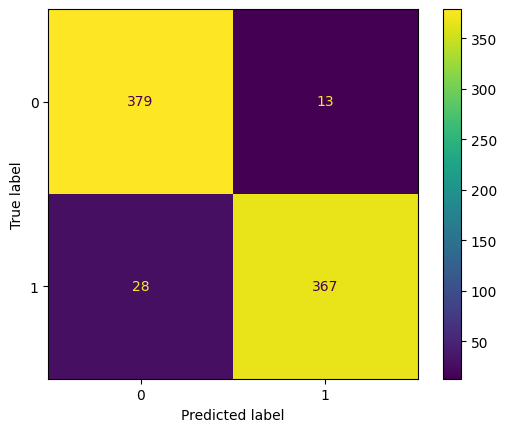

In [25]:
# confusion matrix
cf_matrix_train = confusion_matrix(Y_train, training_data_predictions)
cm_display_train = ConfusionMatrixDisplay(cf_matrix_train).plot()

In [26]:
# precision
precision_train = precision_score(Y_train, training_data_predictions)
print(f"The precision on training data is : {round(precision_train, 2)}")

The precision on training data is : 0.97


In [27]:
# recall
recall_train = recall_score(Y_train, training_data_predictions)
print(f"The recall on training data is : {round(recall_train, 2)}")

The recall on training data is : 0.93


In [28]:
print(f"The accuracy score on test data is : {round(accuracy_score(test_data_predictions, Y_test),2)}")

The accuracy score on test data is : 0.94


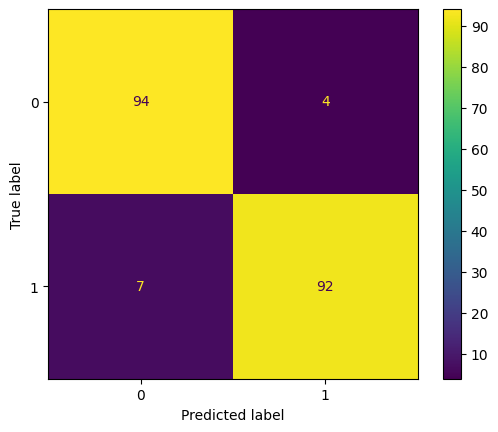

In [29]:
# confusion matrix

cf_matrix_test = confusion_matrix(Y_test, test_data_predictions)
cm_display_test = ConfusionMatrixDisplay(cf_matrix_test).plot()

In [30]:
# precision
precision_test = precision_score(Y_test, test_data_predictions)
print(f"The precision on test data is : {round(precision_test, 2)}")

The precision on test data is : 0.96


In [31]:
# recall
recall_test = recall_score(Y_test, test_data_predictions)
print(f"The recall on test data is : {round(recall_test, 2)}")

The recall on test data is : 0.93
